In [43]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

In [44]:
input_size = 784
hidden_size = 128
num_classes = 10
num_epochs = 20
batch_size = 4096
learning_rate = 0.5

In [45]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

In [46]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, hidden_size) 
        self.fc5 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc5(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [48]:
# Train the model
total_step = len(train_loader)

def train_epoch():
    for images, labels in train_loader:  
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss.item()

def accuracy(loader):
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loader:
            images = images.reshape(-1, 28*28)
            labels = labels
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        return correct/total

def loss(loader):
    with torch.no_grad():
        loss = 0
        total = 0
        for images, labels in loader:
            images = images.reshape(-1, 28*28)
            labels = labels
            outputs = model(images)
            loss += criterion(outputs, labels).item()*labels.size(0)
            total += labels.size(0)
        return loss/total

train_loss=[]
train_accuracy=[]
test_loss=[]
test_accuracy=[]
epoch_list=[]

for epoch in range(num_epochs):
    train_loss.append(train_epoch())
    train_accuracy.append(accuracy(train_loader))
    test_loss.append(loss(test_loader))
    test_accuracy.append(accuracy(test_loader))
    print('Epoch: {} TrainLoss: {:.3f} TestLoss: {:.3f} TrainAccuracy: {:.3f} TestAccuracy: {:.3f}'.format(epoch+1,train_loss[-1],test_loss[-1],train_accuracy[-1],test_accuracy[-1]))

Epoch: 1 TrainLoss: 1.474 TestLoss: 1.799 TrainAccuracy: 0.404 TestAccuracy: 0.404
Epoch: 2 TrainLoss: 1.249 TestLoss: 1.398 TrainAccuracy: 0.553 TestAccuracy: 0.563
Epoch: 3 TrainLoss: 0.606 TestLoss: 0.490 TrainAccuracy: 0.860 TestAccuracy: 0.868
Epoch: 4 TrainLoss: 0.419 TestLoss: 0.388 TrainAccuracy: 0.882 TestAccuracy: 0.888
Epoch: 5 TrainLoss: 0.365 TestLoss: 0.368 TrainAccuracy: 0.879 TestAccuracy: 0.883
Epoch: 6 TrainLoss: 0.351 TestLoss: 0.314 TrainAccuracy: 0.902 TestAccuracy: 0.907
Epoch: 7 TrainLoss: 0.299 TestLoss: 0.274 TrainAccuracy: 0.912 TestAccuracy: 0.919
Epoch: 8 TrainLoss: 0.258 TestLoss: 0.253 TrainAccuracy: 0.922 TestAccuracy: 0.927
Epoch: 9 TrainLoss: 0.252 TestLoss: 0.261 TrainAccuracy: 0.916 TestAccuracy: 0.918
Epoch: 10 TrainLoss: 0.221 TestLoss: 0.227 TrainAccuracy: 0.931 TestAccuracy: 0.933
Epoch: 11 TrainLoss: 0.216 TestLoss: 0.209 TrainAccuracy: 0.936 TestAccuracy: 0.936
Epoch: 12 TrainLoss: 0.228 TestLoss: 0.211 TrainAccuracy: 0.935 TestAccuracy: 0.938
E

Text(0.5, 1.0, 'Accuracy')

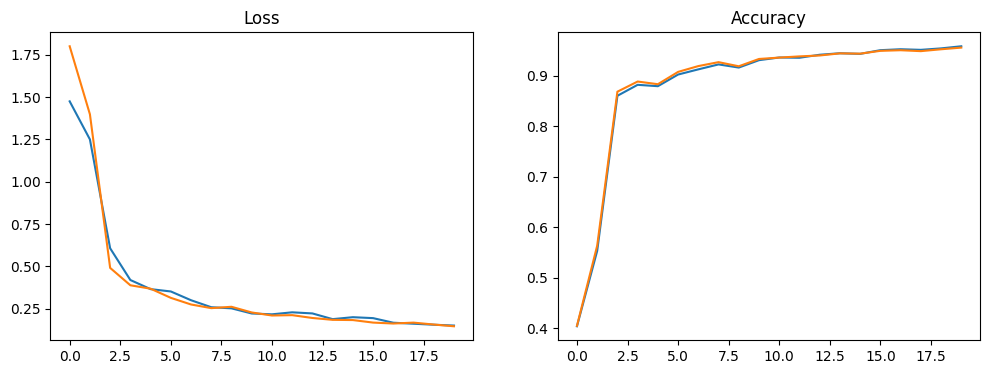

In [49]:
fig, axs = plt.subplots(1,2)

fig.set_size_inches(12,4)

axs[0].plot(np.arange(num_epochs), train_loss,label='Train')
axs[0].plot(np.arange(num_epochs), test_loss,label='Test')
axs[0].set_title('Loss')
axs[1].plot(np.arange(num_epochs), train_accuracy,label='Train')
axs[1].plot(np.arange(num_epochs), test_accuracy,label='Test')
axs[1].set_title('Accuracy')

5

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [59]:
train_labels=np.array([data_point[1] for data_point in train_dataset])
random_train_labels=np.random.permutation(train_labels)
random_train_dataset=[]
for k in range(len(train_dataset)):
    random_train_dataset.append((train_dataset[k][0],random_train_labels[k]))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [ ]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

In [50]:
def network_layer_weight_extraction(model):
    network_weights=[]
    for para in list(model.named_parameters()):
        list_para=list(para)
        if 'weight' in list_para[0]:
            list_weights=list(list_para[1])
            layer_weights=[]
            for row in list_weights:
                row_list=row.tolist()
                layer_weights.append(row_list)
            network_weights.append(np.array(layer_weights))
    return network_weights